<a href="https://colab.research.google.com/github/oscardominguez-ds/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Oscar Dominguez - 03/23/2023
##Assignment - Project 2 Part 3.

#Heart Failure Prediction

Source of data
https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
from sklearn.compose import make_column_selector

In [2]:
## Load the data
import pandas as pd
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
X = df.drop(columns='HeartDisease')
y = df['HeartDisease']
X.shape


(918, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Checking for impossible values. MaxHR has max of 202 which is very high but will leave value
#because it could be an outlier stake holders may need to look into.
# RestingBP, Cholesterol, FastingBS all have mins of zero which we will replace with mean of the column.
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
#Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

##Identify and address missing values.

In [7]:
 #Checking missing values. There are no missing values.
 df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
#Locating row
df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [9]:
#Locating row
df.loc[df['Oldpeak'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [10]:
#Filling Oldpeak rows with 0 value with the mean of the column
restingbp_col = df['Oldpeak']
restingbp_col.replace(to_replace = 0, value = restingbp_col.mean(), inplace=True)

In [11]:
#Filling RestingBP row that has a value 0 with mean of the column and displaying correction
restingbp_col = df['RestingBP']
restingbp_col.replace(to_replace = 0, value = restingbp_col.mean(), inplace=True)


In [12]:
#Filling Cholesterol rows with 0 value with the mean of the column
cholesterol_col = df['Cholesterol']
cholesterol_col.replace(to_replace = 0, value = cholesterol_col.mean(), inplace=True)

In [13]:
#Filling FastingBS rows with 0 value with the mean of the column 
fastingbs_col = df['FastingBS']
fastingbs_col.replace(to_replace = 0, value = fastingbs_col.mean(), inplace=True)

In [14]:
#Checking to ensure mins of 0 for have been filled with the mean of the column
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.540737,236.047413,0.411888,136.809368,1.243083,0.553377
std,9.432617,17.989932,56.240952,0.324427,25.460334,0.833608,0.497414
min,28.000000,80.000000,85.000000,0.233115,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,198.799564,0.233115,120.000000,0.887364,0.000000
50%,54.000000,130.000000,223.000000,0.233115,138.000000,0.887364,1.000000
75%,60.000000,140.000000,267.000000,0.233115,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


##Deleted duplicate rows

In [15]:
#Pringing duplicates
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##Deleted unnecessary columns.

In [16]:
#There are no columns that are identifiers such as IDs, dates, or counters. Hence, no columns will be deleted.

##Identify and correct inconsistencies in data for categorical 

In [17]:
#Printing columns to double check they look ok.
cat_cols = make_column_selector(dtype_include='object')(df)

for col in cat_cols:
  display(df[col].value_counts(normalize=True))

M    0.78976
F    0.21024
Name: Sex, dtype: float64

ASY    0.540305
NAP    0.221133
ATA    0.188453
TA     0.050109
Name: ChestPainType, dtype: float64

Normal    0.601307
LVH       0.204793
ST        0.193900
Name: RestingECG, dtype: float64

N    0.595861
Y    0.404139
Name: ExerciseAngina, dtype: float64

Flat    0.501089
Up      0.430283
Down    0.068627
Name: ST_Slope, dtype: float64

##-Producing univariate visuals for the target and all features.


Text(0.5, 1.0, 'Heart Disease')

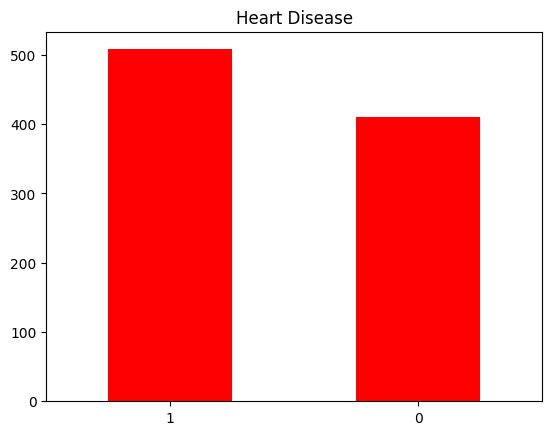

In [18]:
#importig library for bar plot
import matplotlib.pyplot as plt

# Using matplotlib directly
df['HeartDisease'].value_counts().plot.bar(rot=0, color='Red')
plt.title('Heart Disease')


Text(0.5, 1.0, 'Chest Pain Type')

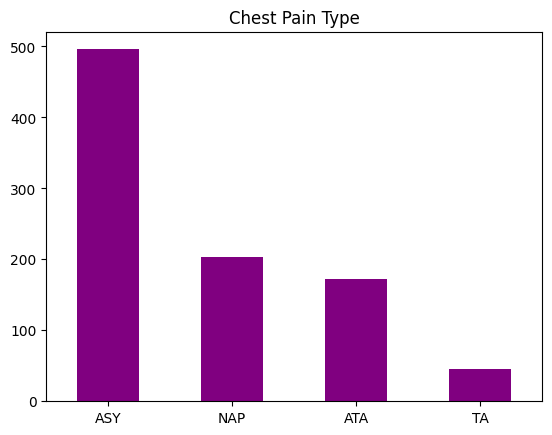

In [19]:
# Using matplotlib directly
df['ChestPainType'].value_counts().plot.bar(rot=0, color='Purple')
plt.title('Chest Pain Type')


Text(0.5, 1.0, 'Sex')

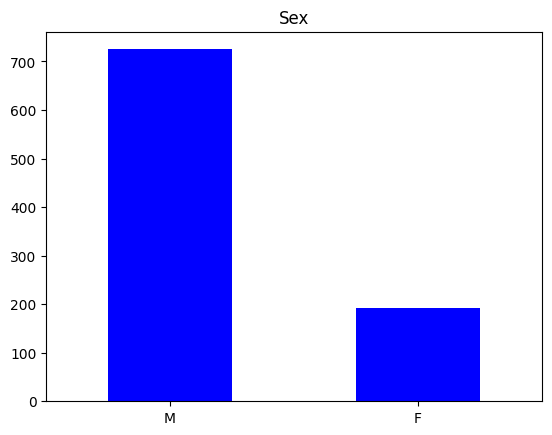

In [20]:
# Using matplotlib directly
df['Sex'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('Sex')

Text(0.5, 1.0, 'Resting ECG')

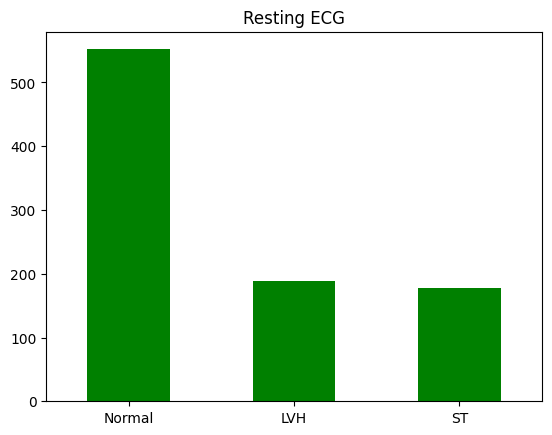

In [21]:
# Using matplotlib directly
df['RestingECG'].value_counts().plot.bar(rot=0, color='Green')
plt.title('Resting ECG')

Text(0.5, 1.0, 'Exercise Angina')

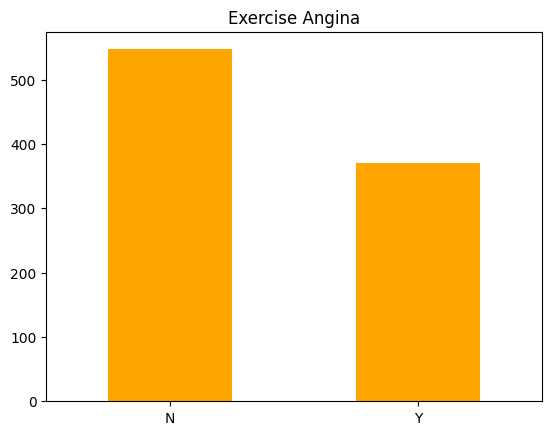

In [22]:
# Using matplotlib directly
df['ExerciseAngina'].value_counts().plot.bar(rot=0, color='Orange')
plt.title('Exercise Angina')

Text(0.5, 1.0, 'ST Slope')

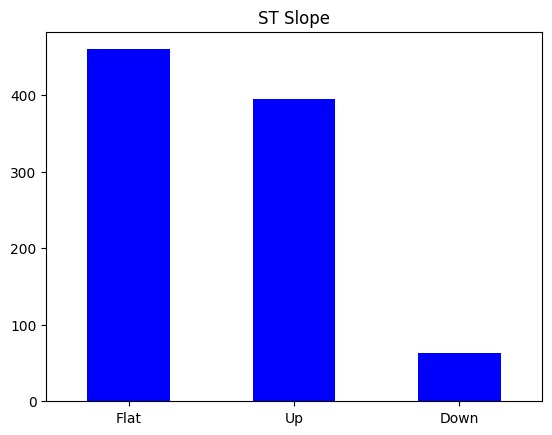

In [23]:
# Using matplotlib directly
df['ST_Slope'].value_counts().plot.bar(rot=0, color='Blue')
plt.title('ST Slope')

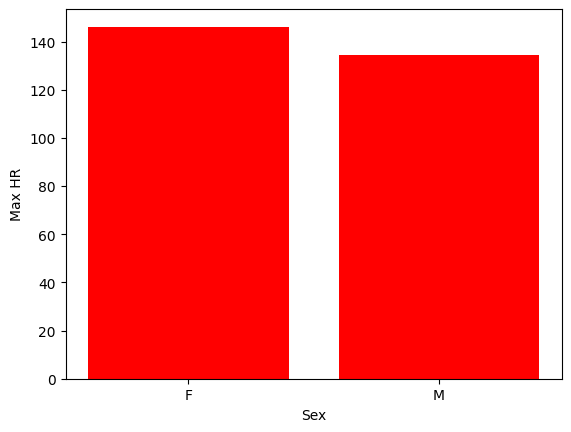

In [24]:
# Using matplotlib directly
maxhr_mean = df.groupby('Sex')['MaxHR'].mean()

fig, ax = plt.subplots()
ax.bar(maxhr_mean.index, maxhr_mean.values,color='Red')

ax.set_ylabel('Max HR')
ax.set_xlabel('Sex');

##-Identified outliers.

###Outliers -  there are some younger patients with heart disease

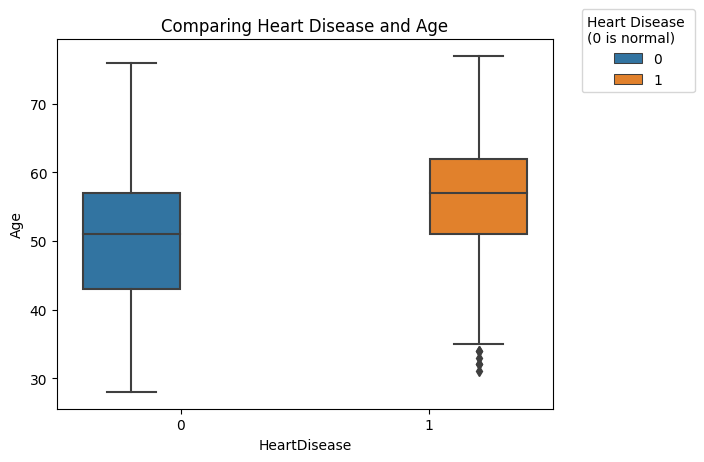

In [25]:
#Importing library for Seaborn boxplot
import seaborn as sns
#I found how to create hue from - https://www.statology.org/seaborn-legend-position/

# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Age', hue='HeartDisease', data=df)

#Setting hut to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Age");


###Outliers - There are patients with and without heart disease have higher than the mean blood presure

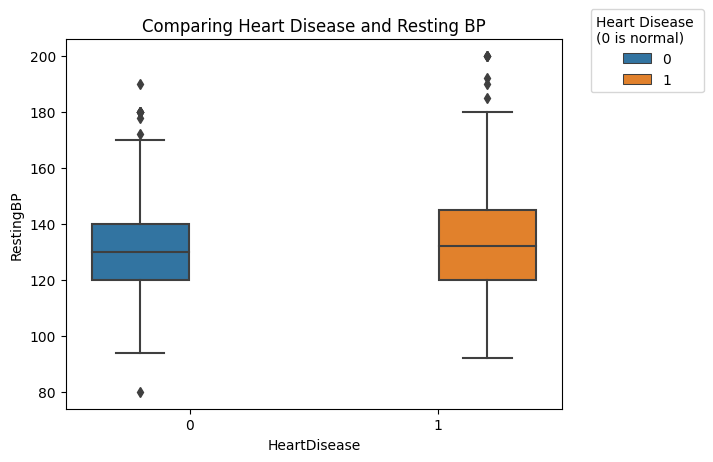

In [26]:
#Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='RestingBP', hue='HeartDisease', data=df)

#Setting hue to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Resting BP");

###Outliers - both patients with and without heard disease have higher than normal Cholesterol

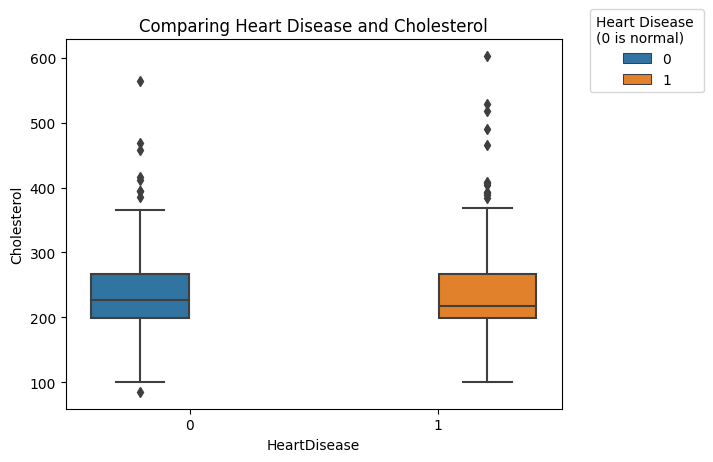

In [27]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Cholesterol', hue='HeartDisease', data=df)

#Setting hue to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Cholesterol");

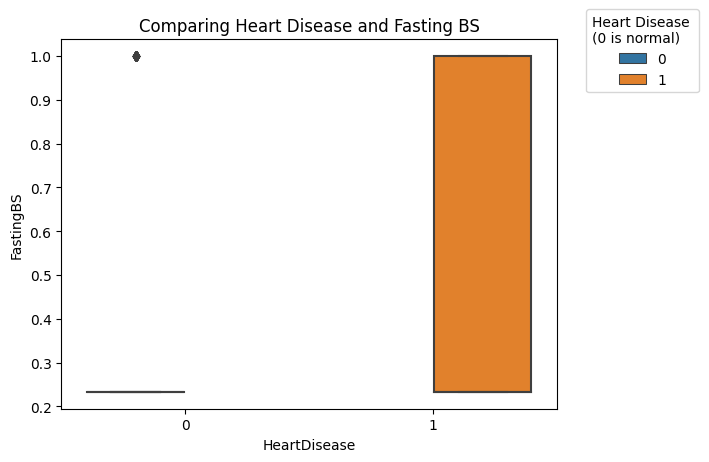

In [28]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='FastingBS', hue='HeartDisease', data=df)

#Setting hue to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Fasting BS");

###Outliers -  some patients have a low heart rate compared to others. Some of the low heart rate patients have malignant 

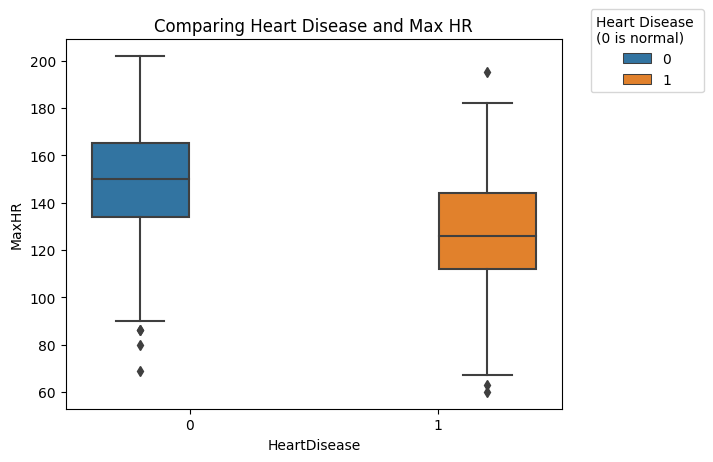

In [29]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='MaxHR',hue='HeartDisease',  data=df)

#Setting hue to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Max HR");

###Outliers - Oldpeak has some outliers in both target categories. 

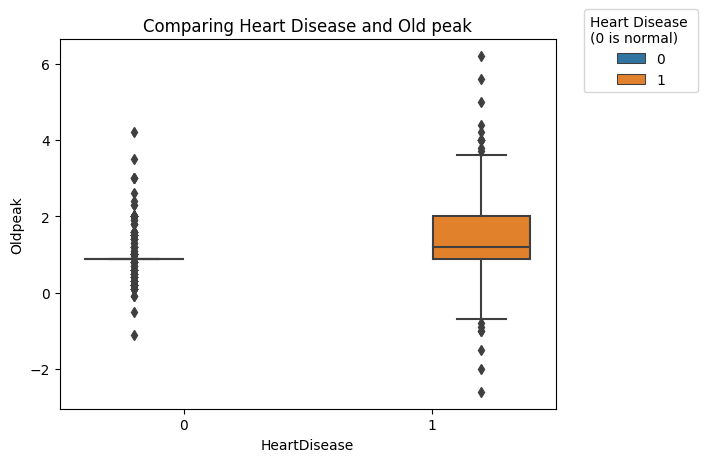

In [30]:
# Boxplot with seaborn
ax = sns.boxplot(x='HeartDisease', y='Oldpeak', hue='HeartDisease', data=df)

#Setting hue to upper right outside of plot
plt.legend(bbox_to_anchor=(1.3, 1.1), loc='upper right', title='Heart Disease \n(0 is normal)')

ax.set_title("Comparing Heart Disease and Old peak");

##1.   Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

##2.   Creating multivariate (multiple variables) exploratory visualizations to further understand data and search for trends.


In [31]:
#Saving datafram to corr variable
corr = df.corr()

###In the heat map below, thereis a low correlation between Oldpeak and HeatDisease

###The rest of the values were below 0.3 in magnitude, hence no other relationships between variables in our dataset.

<Axes: >

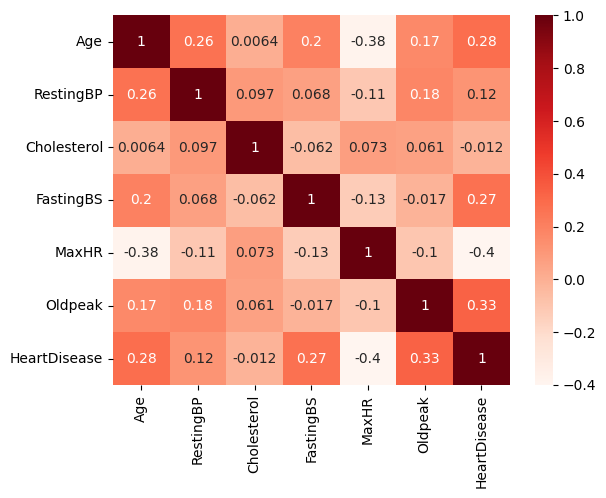

In [32]:
import seaborn as sns

#Creating correlation map
sns.heatmap(corr, cmap = 'Reds', annot = True)

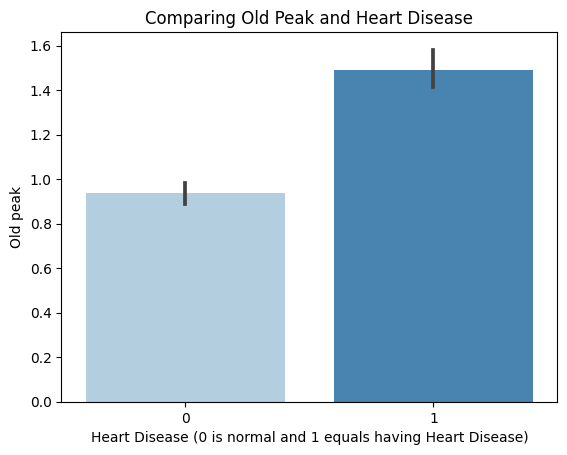

In [33]:
## Using seaborn to plot the means to further explain correlation
ax = sns.barplot(data=df, x='HeartDisease', y='Oldpeak',palette = "Blues");

#Creating titles and labels
ax.set_title("Comparing Old Peak and Heart Disease");
ax.set(xlabel='Heart Disease (0 is normal and 1 equals having Heart Disease)', ylabel='Old peak')
plt.show()

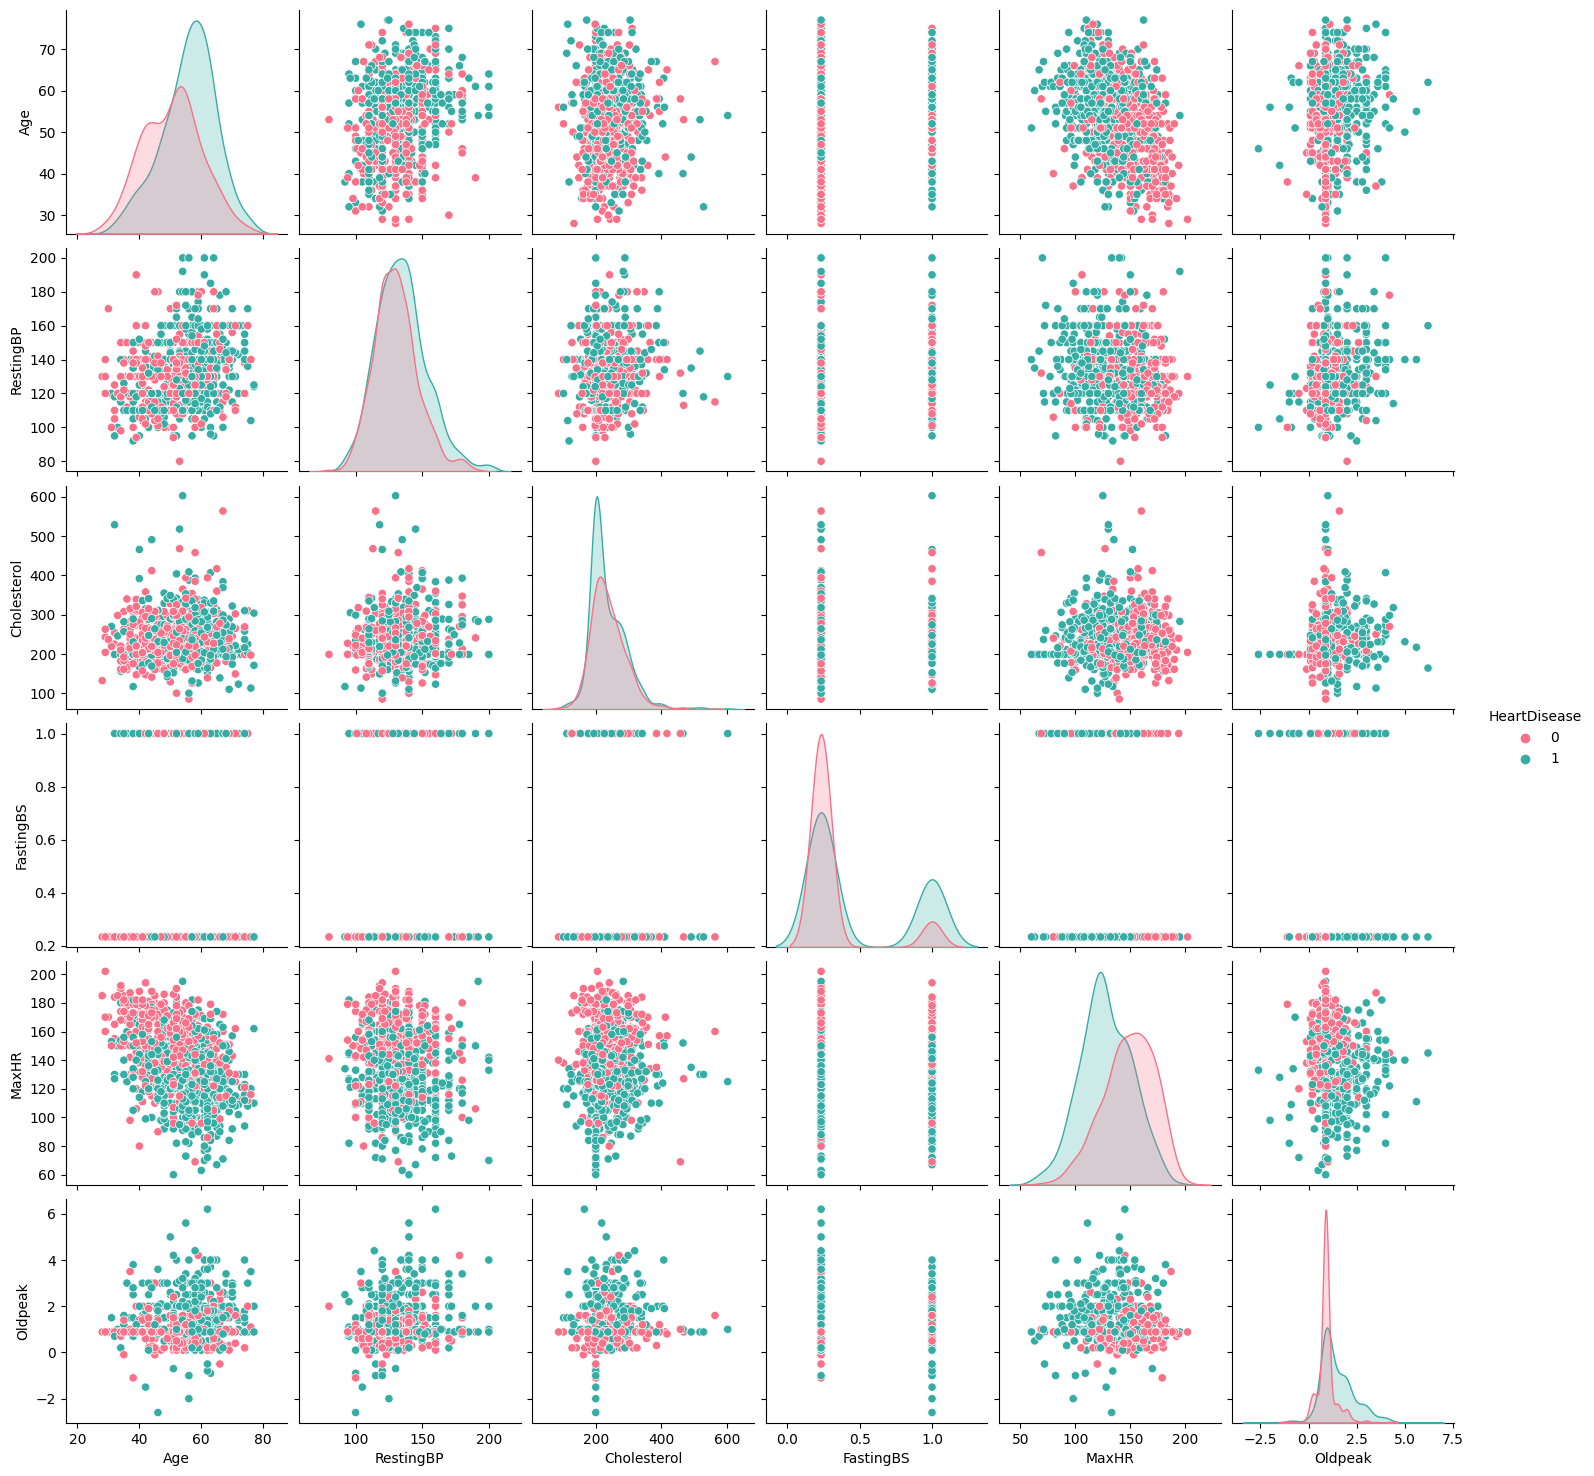

In [34]:
#Pairplot from - 
#https://www.geeksforgeeks.org/python-seaborn-pairplot-method/
#How to change color-
#https://stackoverflow.com/questions/65755362/change-plot-color-seaborn-package
#Palette colors avail from - https://seaborn.pydata.org/tutorial/color_palettes.html
sns.pairplot(df, hue ='HeartDisease', palette = "husl")
plt.show()

##Both graphs below show that the those with a 1 for HeartDisease have a slightly higher Oldeak. 0 being 'normal' for HeartDisease

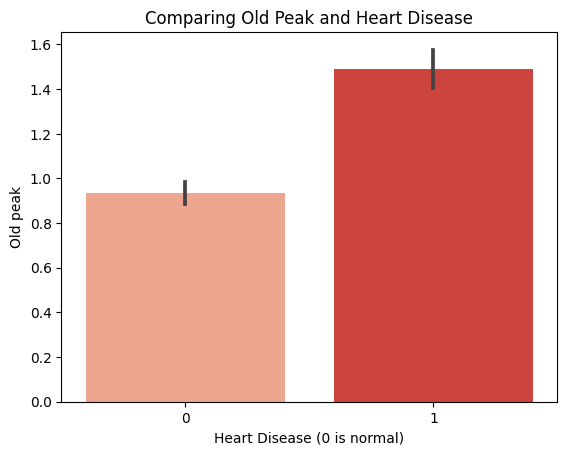

In [35]:
#Creating plot
ax = sns.barplot(data=df, x='HeartDisease', y='Oldpeak',palette = "Reds");
ax.set_title("Comparing Old Peak and Heart Disease");
ax.set(xlabel='Heart Disease (0 is normal)', ylabel='Old peak')
plt.show()

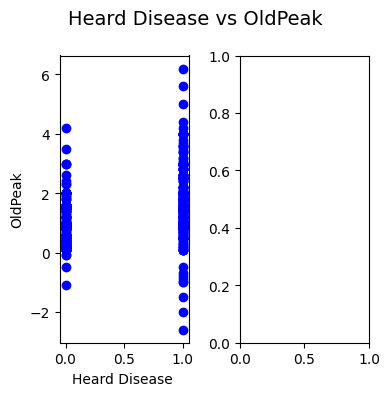

In [36]:
#Creating plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (4,4));
axes[0].scatter(df['HeartDisease'], df['Oldpeak'], c = 'blue');
axes[0].set_ylabel("OldPeak")
axes[0].set_xlabel("Heard Disease ")
fig.suptitle("Heard Disease vs OldPeak", 
             fontsize=14)
## Fixing overlapping labels
fig.tight_layout()

#Fit and evaluate multiple types of models on your data.


*   Evaluate each model with multiple appropriate metrics on BOTH the train and test data.
*   Use GridSearchCV to tune some of the hyperparameters of each model.
Display the metrics of your best tuned version of each model type.


#Model 1 - KNN model

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)


In [39]:
#Binary encoding 'Gender'
df['Sex'].replace({'M':0, 'F':1}, inplace=True)
df['Sex'].value_counts()

0    725
1    193
Name: Sex, dtype: int64

In [40]:
#Binary encoding 'ExerciseAngina'
df['ExerciseAngina'].replace({'N':0, 'Y':1}, inplace=True)
df['ExerciseAngina'].value_counts()


0    547
1    371
Name: ExerciseAngina, dtype: int64

In [41]:
# Selecting numerical and categorical columns
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [42]:
#Importing libraries
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

# Scaler to scale numeric data
scaler = StandardScaler()

# One-hot encoder to encode categorical data
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [43]:
#Importing library
from sklearn.pipeline import make_pipeline
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [44]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [45]:
#Importing libraries
from sklearn.compose import make_column_transformer
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5374184d00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f5375cc2f70>)])

In [46]:
#Importing library to make pipeline.
#Creating pipeline for preprocessor and KNN model then fitting on data
from sklearn.pipeline import make_pipeline
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5374184d00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5375cc2f70>)])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [47]:
#Creating KNN model and printing test scores with default parameters before tuning.
knn_pipe.fit(X_train, y_train)
print(f'Train score: {knn_pipe.score(X_train, y_train)}')
print(f'Test score: {knn_pipe.score(X_test, y_test)}')


Train score: 1.0
Test score: 0.8260869565217391


In [48]:
#Creating param_grid dictionary for GridSearchCV to iterate through ranges and list.
#The parameter were selected previous but there are several parameters available to tune in the KNN model
param_grid = {'kneighborsclassifier__n_neighbors': range(1,10),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [49]:
#Importing libraries
from sklearn.model_selection import GridSearchCV
#Using a pipeline to scale data, tune and fit KNN model using different values for the parameters using GridSearchCV and param_grid
knn_pipe_gs = GridSearchCV(knn_pipe, param_grid)

#Fitting the model on training set and getting best parameters
knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)

#After tuning we get the an Accuracy score of 87% vs without tuning of 83%
#further modification done to ranges since the lowest were 1's for the first two parameters and distance was the 
#best for the third parameter.
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'distance'}
Accuracy of best KNN model is: 0.8913043478260869


In [50]:
#Loading metrics libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, f1_score

#Method will display all scores when called
def model_metrics(pipe, X_train, y_train, X_test, y_test,
                  model_name = 'Classifier Model',):
  train_pred = pipe.predict(X_train)
  test_pred = pipe.predict(X_test)

  metrics = ['Train Accuracy', 'Test accuracy',
             'Train precision', 'Test precision',
             'Train recall', 'Test recall',
             'Train f1', 'Test f1']
  ## Training data
  train_accuracy = accuracy_score(y_train, train_pred)
  train_precision = precision_score(y_train, train_pred)
  train_recall = recall_score(y_train, train_pred)
  train_f1 = f1_score(y_train, train_pred)

  ## Testing data
  test_accuracy = accuracy_score(y_test, test_pred)
  test_precision = precision_score(y_test, test_pred)
  test_recall = recall_score(y_test, test_pred)
  test_f1 = f1_score(y_test, test_pred)


  scores = pd.DataFrame(index=metrics, columns=[f'{model_name}'])
  scores.loc[metrics, f'{model_name}'] = [train_accuracy, test_accuracy,
                                               train_precision, test_precision,
                                               train_recall, test_recall,
                                               train_f1, test_f1]

  return scores

#Tuned KNN model scores. Test accuracy = 0.891304

In [51]:
#Display all of the metris for KNN model. Our is on the test metrics.
scores_df = model_metrics(best_pipe , X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                          model_name='KNN train/test model metrics')

scores_df

,KNN train/test model metrics
Train Accuracy,1.0
Test accuracy,0.891304
Train precision,1.0
Test precision,0.914729
Train recall,1.0
Test recall,0.893939
Train f1,1.0
Test f1,0.904215


#Model 2 - Logistics Regression untuned, tuned, and using PCA (with and without optimal n_components)

In [52]:
#Classification Model
from sklearn.linear_model import LogisticRegression
# Instantiate Standard Scaler because scaling is required for logistic regression
logreg = LogisticRegression()

#Making pipeline to fit onto training data
logreg_pipe = make_pipeline(preprocessor, logreg)

# Training the model on the data
# Best score with default settings is 88.7%
logreg_pipe.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5374184d00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5375cc2f70>)])),
                ('logisticregression', LogisticRegression())])

In [53]:
#Display all of the metris for KNN model. Our is on the test metrics.
scores_df = model_metrics(logreg_pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                          model_name='Logistics Regression untunned model train/test model metrics')

scores_df

,Logistics Regression untunned model train/test model metrics
Train Accuracy,0.87064
Test accuracy,0.865217
Train precision,0.870801
Test precision,0.904
Train recall,0.896277
Test recall,0.856061
Train f1,0.883355
Test f1,0.879377


{0.0001: 0.4260869565217391,
 0.001: 0.4260869565217391,
 0.01: 0.717391304347826,
 0.1: 0.8608695652173913,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

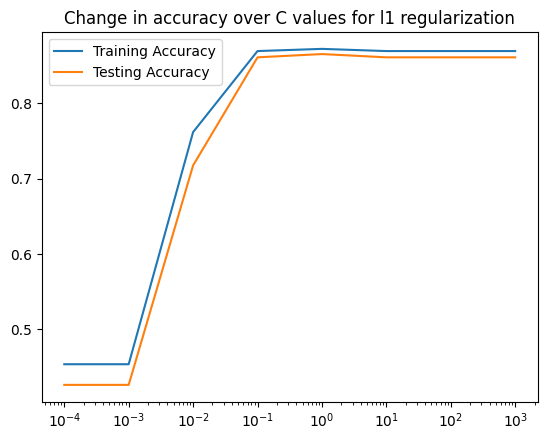

In [54]:
# For loop below will iterate through c_values list to fine best score with parameter penalty set to l1
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
 
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)

  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}


{0.0001: 0.8434782608695652,
 0.001: 0.8434782608695652,
 0.01: 0.8608695652173913,
 0.1: 0.8739130434782608,
 1: 0.8652173913043478,
 10: 0.8608695652173913,
 100: 0.8608695652173913,
 1000: 0.8608695652173913}

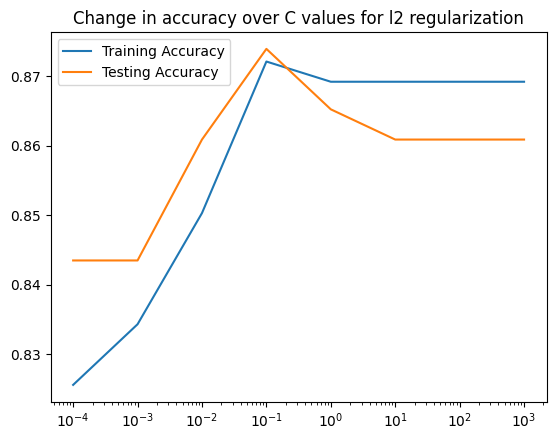

In [55]:
# For loop below will iterate through c_values list to fine best score with parameter penalty set to l2
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

In [56]:
#Creating another instanced that will be tuned
logreg = LogisticRegression(C=.1, max_iter=1000, solver='liblinear', penalty='l2')

#Making pipeline to fit onto training data
logreg_pipe_tuned = make_pipeline(preprocessor, logreg)

# Training the model on the data
# Best score with default settings is 88.7%
logreg_pipe_tuned .fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5374184d00>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f5375cc2f70>)])),
                ('logisticregression',
                 LogisticRegression(C=0.1, max_iter=1000, solver='liblinear'))])

##Tuned Logicstics Regression Model scores - Test accuracy	0.873913

In [57]:
#Display all of the metris for KNN model. Our is on the test metrics.
#Our tuned model gave us a better Testing Accuracy
scores_df = model_metrics(logreg_pipe_tuned, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                          model_name='Logistics Regression untunned model train/test model metrics')

scores_df

,Logistics Regression untunned model train/test model metrics
Train Accuracy,0.872093
Test accuracy,0.873913
Train precision,0.871134
Test precision,0.912
Train recall,0.898936
Test recall,0.863636
Train f1,0.884817
Test f1,0.88716


##Using PCA using all n_components or columns on a untuned Logistics Regression model. Test Accuracy = 0.865217




In [58]:
#Importing libraries
from sklearn.decomposition import PCA

#Instansiating PCA with all features
pca = PCA(n_components=10)

pipe = make_pipeline(
    preprocessor,
    pca,
    LogisticRegression()
    
)
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.8652173913043478

In [59]:
#Display all of the metris for KNN model. Our is on the test metrics.
scores_df = model_metrics(pipe, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                          model_name='KNN train/test model metrics')

scores_df

,KNN train/test model metrics
Train Accuracy,0.867733
Test accuracy,0.865217
Train precision,0.872063
Test precision,0.910569
Train recall,0.888298
Test recall,0.848485
Train f1,0.880105
Test f1,0.878431


#Fiding optimal n_components

<ipython-input-60-625b8a12d14e>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


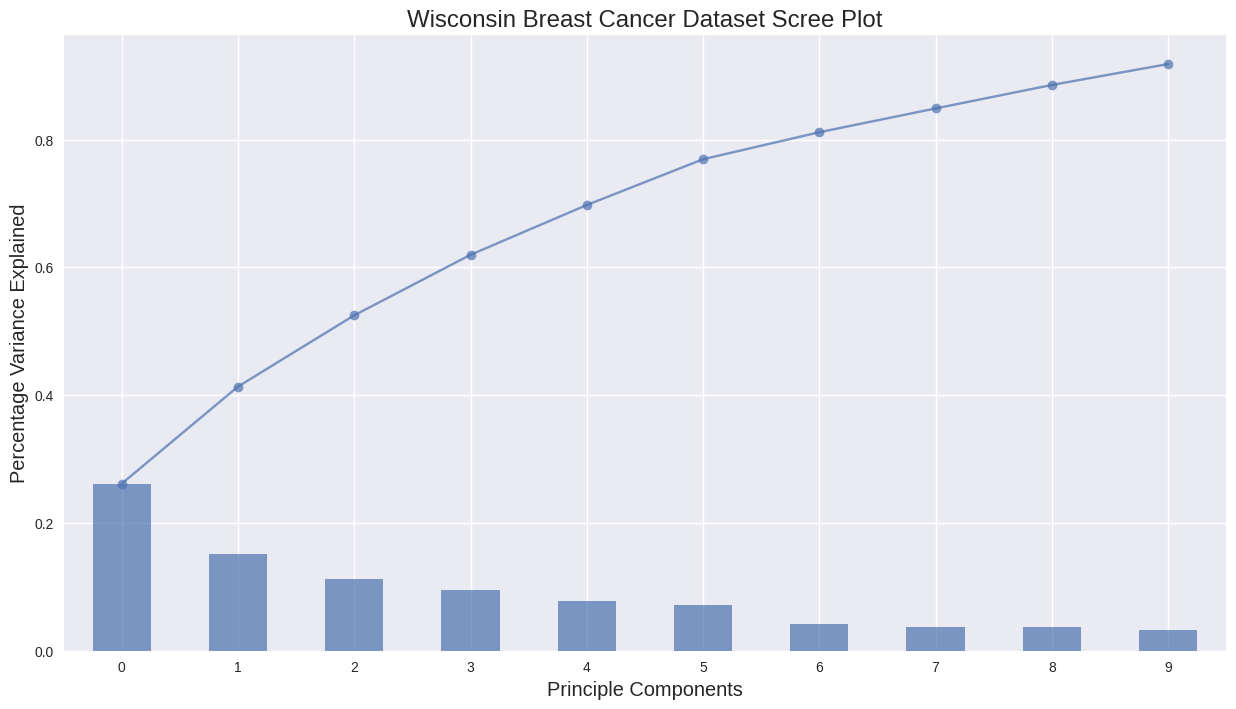

In [60]:
# Lets visual the cummulative sum of the variances 

plt.style.use("seaborn")
plt.figure(figsize=(15,8))
exp_var = pd.Series(pca.explained_variance_ratio_)

# Plot the variance for each component
exp_var.plot(kind="bar", alpha=0.7) # plot bar chart

# Calculate the amount of variance explained added by each additional component
total = 0
var_ls = []
for x in exp_var:
    total = total+x
    var_ls.append(total)
    
# Plot line chart of increasing variances
pd.Series(var_ls).plot(marker="o", alpha=0.7) 

# Plot labels and titles
plt.xlabel("Principle Components", fontsize="x-large")
plt.ylabel("Percentage Variance Explained", fontsize="x-large")
plt.title("Wisconsin Breast Cancer Dataset Scree Plot", fontsize="xx-large")
plt.show();

#Using PCA with optimal n_components on tuned Logistics Regression Model . Test Accuracy = 0.86087. Athough the scores are about the same, we are using less features or data due to the number of n_components! 

In [61]:
#Instansiating PCA with optinal n_components 
pca = PCA(n_components=7)

#Creating pipeline 
pipe1 = make_pipeline(
    preprocessor,
    pca,
    LogisticRegression(C=.1, max_iter=1000, solver='liblinear', penalty='l2')
    
)

#Fitting to learn patterns
pipe1.fit(X_train,y_train)
pipe1.score(X_test,y_test)

0.8608695652173913

In [62]:
#Display all of the metris for KNN model. Our is on the test metrics.
scores_df = model_metrics(pipe1, X_train=X_train, y_train=y_train, 
                          X_test=X_test, y_test=y_test, 
                          model_name='KNN train/test model metrics')

scores_df

,KNN train/test model metrics
Train Accuracy,0.861919
Test accuracy,0.86087
Train precision,0.866841
Test precision,0.909836
Train recall,0.882979
Test recall,0.840909
Train f1,0.874835
Test f1,0.874016


##The best model was the KNN Model tuned using GridSearchCV. 